#### Getting the Task 2 data file

In [111]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#https://drive.google.com/file/d/13hOJmMQvd8qEx1uZbQzC_14Uv98omW6z/view?usp=sharing
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '13hOJmMQvd8qEx1uZbQzC_14Uv98omW6z'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('Task2.mat')  
# print('Downloaded content "{}"'.format(downloaded.GetContentString()))

In [112]:
#Install this if haven't done already
# !pip install numpy

In [113]:
import numpy as np
import scipy.io
#Getting the file
mat = scipy.io.loadmat('Task2.mat')

####Checking the shapes of the data matrices

In [114]:
mat['A'].shape

(5, 5, 256)

In [115]:
mat['Image'].shape

(5, 5)

In [116]:
A = mat['A']
y = mat['Image']

#### Checkig the data

In [117]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
# img = cv2.imread(y)
cv2_imshow(y)

In [118]:
y

array([[0, 0, 0, 0, 0],
       [0, 1, 0, 1, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 1, 1, 0],
       [0, 0, 0, 0, 0]], dtype=uint8)

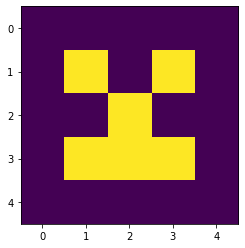

In [119]:
plt.imshow(y,interpolation='nearest')
plt.show()

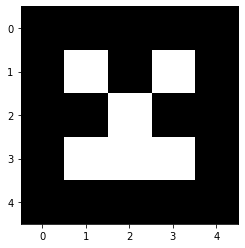

In [120]:
plt.imshow(y,cmap='gray', vmin = 0, vmax = 1,interpolation='none')
plt.show()

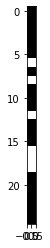

In [121]:
y_resized = y.reshape(y.shape[0]*y.shape[1],1)
plt.imshow(y_resized,cmap='gray', vmin = 0, vmax = 1,interpolation='none')
plt.show()

In [122]:
A

array([[[ 0.2       ,  0.20614266,  0.21488617, ...,  0.2735444 ,
          0.24882771,  0.18057364],
        [ 0.2       ,  0.20614266,  0.21488617, ..., -0.37438422,
         -0.34055593, -0.24714058],
        [ 0.2       ,  0.20614266,  0.21488617, ...,  0.24864487,
          0.22617802,  0.16413682],
        [ 0.2       ,  0.20614266,  0.21488617, ..., -0.32554203,
         -0.29612698, -0.2148986 ],
        [ 0.2       ,  0.20614266,  0.21488617, ...,  0.17773699,
          0.16167718,  0.11732872]],

       [[ 0.2       ,  0.17057094,  0.17371166, ..., -0.23140237,
         -0.2715757 , -0.24714058],
        [ 0.2       ,  0.17057094,  0.17371166, ...,  0.3167069 ,
          0.37168978,  0.33824686],
        [ 0.2       ,  0.17057094,  0.17371166, ..., -0.21033884,
         -0.24685537, -0.22464447],
        [ 0.2       ,  0.17057094,  0.17371166, ...,  0.27538929,
          0.3231991 ,  0.29411915],
        [ 0.2       ,  0.17057094,  0.17371166, ..., -0.15035498,
         -0.17

In [123]:
A_resized = A.reshape(25,256)
A_resized

array([[ 0.2       ,  0.20614266,  0.21488617, ...,  0.2735444 ,
         0.24882771,  0.18057364],
       [ 0.2       ,  0.20614266,  0.21488617, ..., -0.37438422,
        -0.34055593, -0.24714058],
       [ 0.2       ,  0.20614266,  0.21488617, ...,  0.24864487,
         0.22617802,  0.16413682],
       ...,
       [ 0.2       , -0.33608305, -0.32602633, ..., -0.17917233,
        -0.01969672,  0.10664881],
       [ 0.2       , -0.33608305, -0.32602633, ...,  0.23458407,
         0.02578823, -0.13963156],
       [ 0.2       , -0.33608305, -0.32602633, ..., -0.12807645,
        -0.01407966,  0.07623499]])

### Compiling functions obtained in Task1 into a clean, bigger class

In [124]:
class obtain_sparse:
  def __init__(self, A, y, iter = 20, threshold_val = 0.25):
    self.A = A
    self.y = y
    self.R = y
    # self.norm_R = np.squeeze(np.linalg.norm(self.R))
    # self.threshold_val = self.norm_R + 1
    self.threshold_val = threshold_val
    self.count_val = iter
  
    #Using Matching pursuit
  def find_x_mp(self):
    #A has shape (m,N)
    #x has shape (N,1)
    #y has shape (m,1)
    N = self.A.shape[1]
    m = self.A.shape[0]
    #gi where i = 1 to N are the columns in A.T
    #Normalizing the columns
    # A_normed = (self.A -self.A.min(0)) / self.A.ptp(0)
    #initialization
    R = self.R
    F = np.zeros(self.y.shape)
    count = 0
    count_val = self.count_val
    # norm_R = self.norm_R
    norm_Fy = np.squeeze(np.linalg.norm(F-self.y))
    threshold = self.threshold_val
    i_list = []
    a_list =[]
    ai_list=[]
    while(norm_Fy>threshold and count<count_val):
      i_max = np.argmax(abs(np.dot(self.A.T, R)))  
      gn = self.A[:,i_max].reshape(m,1)
      an = np.dot(self.A.T, R)[i_max, 0]
      R= R - an*gn
      F= F + an*gn
      # norm_R = np.squeeze(np.linalg.norm(R))
      norm_Fy = np.squeeze(np.linalg.norm(F-self.y))
      count=count+1
      a_list.append(an)
      i_list.append(i_max)
      ai_list.append((an,i_max))

    return a_list, i_list, ai_list

  def construct_x(self, ai_list,N):
    x = np.zeros((N,1))
    for tuple_ai in ai_list:
      x[tuple_ai[1]] += np.squeeze(tuple_ai[0])
    self.x = x
    return x
  
  def get_y_pred(self):
    self.y_pred = np.dot(self.A,self.x)
    return self.y_pred

  def calc_error(self):
    self.error = np.linalg.norm(self.y_pred-self.y)
    return self.error


#### For 5 iterations:

In [125]:
Obtain_sparse = obtain_sparse(A_resized,y_resized, 5, 0.25)
a_list, i_list, ai_list = Obtain_sparse.find_x_mp()
N = A_resized.shape[1]
x = Obtain_sparse.construct_x(ai_list,N)
y_pred = Obtain_sparse.get_y_pred()
error = Obtain_sparse.calc_error()

error

In [126]:
error

0.9628309703975242

Predicted y for 5 iterations:

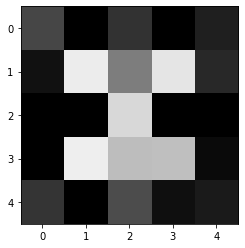

In [127]:
y_pred_resize = y_pred.reshape(y.shape)
plt.imshow(y_pred_resize,cmap='gray', vmin = 0, vmax = 1,interpolation='none')
plt.show()

#### Getting the y predicted and errors for 1st 10 iterations<br>
#### And plotting them with their respective errors on top

In [128]:
y_pred_iter = {}
error_iter = {}
for itern in range(10):
  Obtain_sparse = obtain_sparse(A_resized,y_resized, itern, 0.25)
  a_list, i_list, ai_list = Obtain_sparse.find_x_mp()
  N = A_resized.shape[1]
  x = Obtain_sparse.construct_x(ai_list,N)
  y_pred_iter[itern] = Obtain_sparse.get_y_pred()
  error_iter[itern] = Obtain_sparse.calc_error()


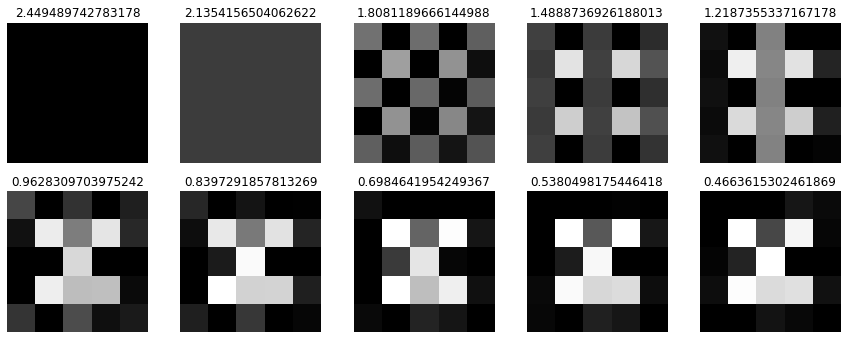

In [129]:
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
for itern in range(10):
  ax = plt.subplot(5,5,itern+1)
  ax.set_title(str(error_iter[itern]))
  y_pred_resize = y_pred_iter[itern].reshape(y.shape)
  plt.imshow(y_pred_resize,cmap='gray', vmin = 0, vmax = 1,interpolation='none')
  plt.axis('off')
# plt.show()
  # ax = plt.subplot("211")
  # ax.set_title("Title for first plot")
  # ax.plot(data)

#### For 50 iterations and low threshold:

In [130]:
Obtain_sparse = obtain_sparse(A_resized,y_resized, 50, 0.00001)
a_list, i_list, ai_list = Obtain_sparse.find_x_mp()
N = A_resized.shape[1]
x = Obtain_sparse.construct_x(ai_list,N)
y_pred = Obtain_sparse.get_y_pred()
error = Obtain_sparse.calc_error()

error

In [131]:
error

0.000421849021096877

*Predicted* y for 50 iterations:

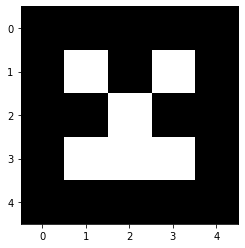

In [132]:
y_pred_resize = y_pred.reshape(y.shape)
plt.imshow(y_pred_resize,cmap='gray', vmin = 0, vmax = 1,interpolation='none')
plt.show()

#### **Observations:** <br>
- Since this is a very simple figure, it can obtain the sparse vector in few iterations
- Can use normalization later if needed
- If we compare the y_predicted for 15 or more iterations and original y, we can see that the former is slightly blurry thn the latter